今回はよく登場する有名な確率分布を紹介していきます。様々な現象がどのような分布によって表現されるか(例えば身長の分布には何を使うべきか？1時間あたりの来客者数の分布には何を使うべきか？など)という事を覚えていきましょう。また、大変便利なPythonのライブラリであるscipy.statsの使い方も覚えましょう。

<img src="http://nineties.github.io/prml-seminar/fig/distributions.png" alt="主要な確率分布" width="900" />

# 離散的分布

## 一様分布
$X=a,a+1,\ldots,b$ の値を全て等しい確率で取る分布を**離散一様分布(discrete uniform distribution)**と呼びます。例えばサイコロの出目の分布などがこれに当たります。値は全部で $b-a+1$ 種類あるので
$$ P(X) = \frac{1}{b-a+1} $$
です。各種統計量は以下です。

$$ \mathrm{E}[X] = \frac{a+b}{2},\quad\mathrm{V}[X] = \frac{(b-a+1)^2-1}{12} $$

Pythonではscipy.stats.randintがこれを実装しています。

In [2]:
import scipy.stats as stats
a = 1
b = 6
rv = stats.randint(a, b+1) # 確率分布を生成
print (u'平均=',rv.mean())
print (u'分散=',rv.var())
print (u'標準偏差=',rv.std())
print (u'エントロピー=',rv.entropy())

平均= 3.5
分散= 2.91666666667
標準偏差= 1.70782512766
エントロピー= 1.791759469228055


P(X=3) = 0.166666666667


<Container object of 10 artists>

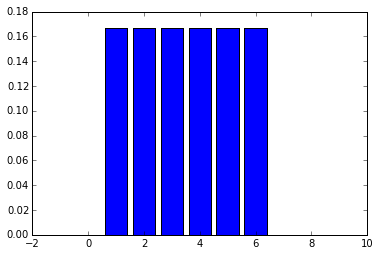

In [4]:
# 離散分布ではpmf(x)が確率の値を返す
print (u'P(X=3) =',rv.pmf(3))
x = arange(0, 10)
bar(x, rv.pmf(x), align='center')

P(X<=5) = 0.833333333333
P(2 < X <= 4) = 0.333333333333


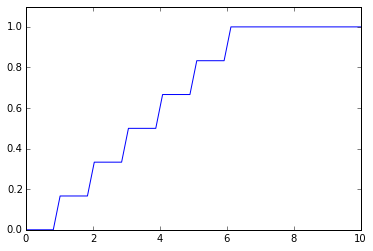

In [5]:
# cdf(x) が累積分布関数
print (u'P(X<=5) =',rv.cdf(5))
print (u'P(2 < X <= 4) =',rv.cdf(4)-rv.cdf(2))

x = linspace(0, 10)
ylim(0, 1.1)
plot(x, rv.cdf(x))

# ppf(x)は累積分布関数の逆関数

print u'P(X <= a) = 0.3 となる a は',rv.ppf(0.3)

# rvs(型)で分布からのサンプリングが出来る
print rv.rvs(10)     # サイコロを10回振る
print rv.rvs((2, 3)) # サイコロを6回振って2x3行列にする

## ベルヌーイ分布
確率 $p$ で $X=1$, 確率 $1-p$ で $X=0$ となる様な確率変数 $X$ の分布を**ベルヌーイ分布(Bernoulli distribution)**と呼び $\mathrm{Bern}(X|p)$ と書きます。

$$\begin{array}{|c|c|c|}\hline
X & 0  & 1 \\ \hline
P(X) & 1-p & p \\ \hline
\end{array}$$

確率 $p$ で成功する試行を一回行った時の成功回数 $X$の分布と考える事が出来ます。確率の具体的な式は

$$\mathrm{Bern}(X|p) = p^X(1-p)^{1-X}\qquad (X=0,1)$$

となります。各種統計量は以下です。

$$ \mathrm{E}[X] = p,\quad\mathrm{V}[X]=p(1-p)$$

In [7]:
stats.bernoulli(0.3).rvs(100)  # 確率0.3で成功する試行を100回行ってみる

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0])

## カテゴリ分布
$X=0,1,2,\ldots,K-1$ の各値を確率 $\mathbf{p}=(p_0,p_1,\ldots,p_{K-1})$ で取る確率分布を**カテゴリ分布(categorical distribution)**と呼び $\mathrm{Cat}_K(X|\mathbf{p})$ と書きます。


$$\begin{array}{|c|c|c|}\hline
X & 0  & 1 & \cdots & K-1\\ \hline
P(X) & p_0 & p_1 & \cdots & p_{K-1} \\ \hline
\end{array}$$

ベルヌーイ分布はカテゴリ分布の特別な場合で $\mathrm{Bern}(X|p) = \mathrm{Cat}_2(X|(1-p, p))$ が成り立ちます。

カテゴリ分布では以下のような実数値でないカテゴリ変数を考える事が多く、実数値 $X=0,1,2,\ldots,K-1$ の上での確率分布として考える事はあまりありません。

$$\begin{array}{|c|c|c|}\hline
A & \text{りんご }& \text{みかん} & \text{ぶどう} \\ \hline
P(A) & p_0 & p_1 & p_2 \\ \hline
\end{array}$$

このことが理由であるのかは分かりませんが、scipy.statsにはカテゴリ分布が用意されていません。numpy.random.choiceを利用すれば、サンプリングを行う事は可能です。

(array([ 130.,   74.,  207.,  366.,  223.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <a list of 5 Patch objects>)

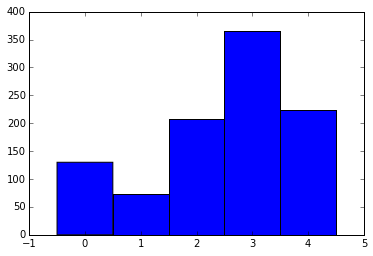

In [8]:
# K=5で確率比が2:1:3:5:3のカテゴリカル分布からサンプリング
N = 1000

weight = array([2, 1, 3, 5, 3], dtype=float)
samples = random.choice(arange(5), N, p = weight/sum(weight))  # arange(5) = [0,1,2,3,4] からサンプリング
hist(samples, bins=5, range=(-0.5, 4.5), align='mid')

カテゴリ分布の有名な例は[英文における文字の出現頻度](http://en.wikipedia.org/wiki/Letter_frequency)ではないかと思います。

### 例題
サイコロを100回振った時に、1が30回以上でる確率は？

In [10]:
rv = stats.binom(100, 1.0/6)
print (u'P(X >= 30) = 1 - P(X <= 29) =',1-rv.cdf(29))

P(X >= 30) = 1 - P(X <= 29) = 0.000676599674678


### ベルヌーイ分布との関係

$X_1,X_2,\ldots,X_n \stackrel{\text{i.i.d.}}{\sim}\mathrm{Bern}(p)$ のとき，成功なら $X_i=1$, 失敗なら $X_i = 0$ なので $X_1+X_2+\cdots+X_n$ が成功回数となります。つまり、$X_1 + X_2 + \cdots + X_n \sim \mathrm{Bin}(n,p)$ となります。

## 多項分布
カテゴリ分布 $\mathrm{Cat}_K(\mathbf{p})$ に従う試行を $n$ 回行った時の、$0,1,2,\ldots,K-1$ のそれぞれの出現回数 $\mathbf{X}=(X_0,X_1,\ldots,X_{K-1})$ の分布を**多項分布(multinomial distribution)**と呼び，$\mathrm{MultiNomial}_K(\mathbf{X}|n,\mathbf{p})$ と書きます。

多項分布は二項分布を一般化したもので，$\mathrm{Bin}(X|n,p)=\mathrm{MultiNomial}_{2}((X,n-X)|n,(p,1-p))$ が成り立ちます。

$$\mathbf{P}(x_0,x_2,\ldots,x_{K-1}) = \frac{n!}{x_0!x_1!\cdots x_{K-1}!}p_0^{x_0}p_1^{x_1}\cdots p_{K-1}^{x_{K-1}}\qquad(x_0,\ldots,x_{K-1}\geq 0, x_0+\cdots+x_{K-1}=n)$$

平均は $\mathrm{E}[\mathbf{X}] = n\mathbf{p}$ で、分散共分散行列 $\boldsymbol{\Sigma}$ は

$$ \Sigma_{ii} = np_i(1-p_i),\quad \Sigma_{ij} = -np_ip_j $$

となります。多項分布での共分散は全て負になります。何故ならば，試行回数が固定なのである値の出現回数が増加すれば、他の値の出現回数は減少する為です。
多項分布もやはりscipy.statsには用意されていないのですが、numpy.random.multinomialを使えばサンプリングは出来ます。

### 例
ある本のアルファベットの出現頻度が先ほどの`letter_table`に従うと仮定します。この本のある１ページ(1000文字)ないに各文字が何回出現するかという試行をしてみます。

In [12]:
N = 1000
freq = random.multinomial(N, letter_freq)
print (zip(letter, freq))

NameError: name 'letter_freq' is not defined

## ポアソン分布

$X=0,1,2,\ldots$ に対してその確率が

$$P(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

で与えられる分布を**ポアソン分布(poisson distribution)**と呼び $\mathrm{Po}(X|\lambda)$ と書きます。

$$\mathrm{E}[X] = \lambda, \quad \mathrm{V}[X]=\lambda$$

$p$ が非常に小さく、 $n$ が非常に大きい時に $\lambda=np$ のポアソン分布で二項分布を近似する事が出来ます。つまり、
$$ \mathrm{Po}(X|np) \approx \mathrm{Bin}(X|n,p)$$
です。従ってポアソン分布は「非常に稀なイベントの発生回数」の確率分布であると考える事が出来ます。$\lambda$ は(「非常に大きな集団内での～」「単位時間あたりの～」)発生回数の期待値です。

n = 100
p = 0.05
l = n*p
x = arange(0, 20)
xlim(0, 20)
ylim(0, 0.2)
bar(x, stats.binom(n,p).pmf(x), align='center', alpha=0.5, color='blue', label='binomial')
bar(x, stats.poisson(l).pmf(x), align='center', alpha=0.5, color='red', label='poisson')
legend()

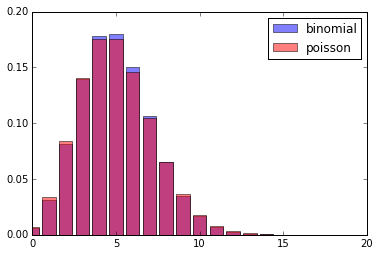

In [13]:
n = 100
p = 0.05
l = n*p
x = arange(0, 20)
xlim(0, 20)
ylim(0, 0.2)
bar(x, stats.binom(n,p).pmf(x), align='center', alpha=0.5, color='blue', label='binomial')
bar(x, stats.poisson(l).pmf(x), align='center', alpha=0.5, color='red', label='poisson')
legend()

### 例題
1時間あたりの来客数が平均 10 人である商店があるとします。来客数がポアソン分布に従うと仮定した場合に、ある1時間にこの商店に20人以上の来客がある確率を求めましょう。

In [15]:
rv = stats.poisson(10)
print (u'P(X>=20) = 1-P(X<19) =',1-rv.cdf(19))

P(X>=20) = 1-P(X<19) = 0.00345434197586


## 幾何分布
確率 $p$ で成功する独立な試行(ベルヌーイ試行)を繰り返した時に、初めて成功するまでの試行回数 $X=1,2,3,\ldots$ の確率分布を**幾何分布(geometric distribution)**と呼び $\mathrm{Geom}(X|p)$ と書きます。

$$ \mathrm{Geom}(X=k|p) = p(1-p)^{k-1},\qquad\mathrm{E}[X]=\frac{1}{p},\qquad\mathrm{V}[X]=\frac{1-p}{p^2}$$

<Container object of 19 artists>

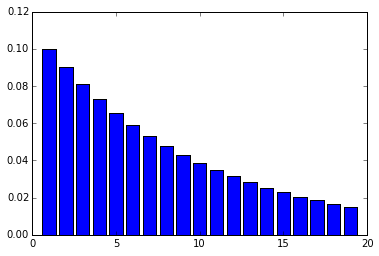

In [16]:
# Geom(X, 0.1)
rv = stats.geom(0.1)
x = arange(1, 20)
bar(x, rv.pmf(x), align='center')

## 例題
サイコロを振って3回以内に1が出る確率は？

In [17]:
rv = stats.geom(1.0/6)
print (u'P(X <= 3) =',rv.cdf(3))

P(X <= 3) = 0.421296296296


## 負の二項分布
確率 $p$ で成功する試行が $r$ 回成功するまでに必要な試行回数 $X=r,r+1,\ldots$ の分布を**負の二項分布(negative binomial distribution)**と呼び $\mathrm{NegBin}(X|r,p)$ と書きます。$r=1$ の時これは幾何分布となりますので、幾何分布を一般化した分布です。

$$\mathrm{NegBin}(X=k|r,p) = \binom{k-1}{r-1}p^r(1-p)^{k-r},\qquad\mathrm{E}[X] = \frac{r}{p},\qquad\mathrm{V}[X]=\frac{r(1-p)}{p^2}$$

負の二項分布には複数通りの異なる定義があるので注意が必要です。scipy.stats.nbinomでも負の二項分布という名前の分布が実装されていますが、`scipy.stats.nbinom(r,p)`は$r$ 回成功するまでの**失敗回数**の分布として定義されているので注意が必要です。

### 例題
コインを投げて5回以内に3回表が出る確率は？

rv = stats.nbinom(3, 0.5)
print (u'P(X <= 5) =',rv.cdf(5-3))

## 超幾何分布
$K$ 本当たりの入っている $N$ 本のクジから $n$ 本取り出した時に、当たりが $X=0,1,\ldots$ 本である確率の分布を**超幾何分布(hyper geometric distribution)**と呼び $\mathrm{HyperGeom}(X|N,K,n)$ と書きます。

$$\mathrm{HyperGeom}(X=k|N,K,n) = \frac{\displaystyle \binom{n}{k}\binom{N-n}{K-k}}{\displaystyle \binom{N}{K}},\qquad\mathrm{E}[X] = \frac{nK}{N},\qquad\mathrm{V}[X] = \frac{(N-n)n(N-K)K}{(N-1)N^2}$$

<Container object of 6 artists>

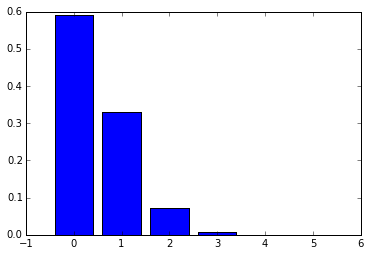

In [18]:
# HyperGeom(X | 1000, 100, 5)
rv = stats.hypergeom(1000, 100, 5)
x = arange(0, 5+1)
bar(x, rv.pmf(x), align='center')

$N$ が非常に大きいならば、クジを引くことによる本数の変化は無視でき、確率 $K/N$ で当たる独立な試行と見なす事が出来ます。つまり $N$ が十分大きいならば

$$ \mathrm{HyperGeom}(X=k|N,K,n) \approx \mathrm{Bin}(X=k|n,K/N) $$

と近似出来ます。

<Container object of 101 artists>

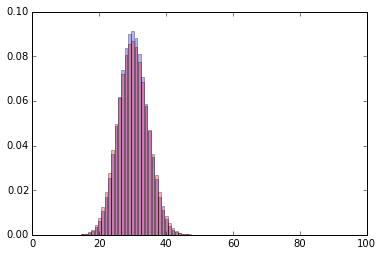

In [19]:
N = 1000
K = 300
n = 100
hgeom = stats.hypergeom(N, K, n)
binom = stats.binom(n, float(K)/N)
x = arange(0, n+1)
xlim(0, n)
bar(x, hgeom.pmf(x), align='center', alpha=0.3, color='blue', label='hyper geometric')
bar(x, binom.pmf(x), align='center', alpha=0.3, color='red', label='binomial')

# 連続分布

## 一様分布
区間 $[a,b]$ における確率密度関数が

$$\pi(x) = \frac{1}{b-a}$$

でそれ以外は $0$ である分布を**連続一様分布(continuous uniform distribution)**と呼び$\mathrm{U}(X|a,b)$と書きます。特に $\mathrm{U}(X)\stackrel{\mathrm{def}}{=}\mathrm{U}(X|0,1)$ を標準一様分布と言います。これは $[a,b]$ 内の実数を全く無作為に選ぶという試行の確率分布です。

$$\mathrm{E}[X] = \frac{a+b}{2},\qquad\mathrm{V}[X] = \frac{(b-a)^2}{12}$$

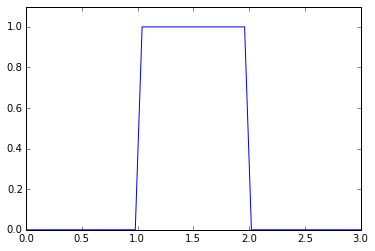

In [20]:
# pdf(x)が確率密度関数
a = 1.0
b = 2.0
x = linspace(0, 3)
ylim(0,1.1)
plot(x, stats.uniform(a, b-a).pdf(x))

連続一様分布に関して重要な点は、任意の連続的な確率分布に対して**累積分布関数の値は標準一様分布に従う**という事実です。
つまり、連続確率変数 $X$ に対して $y=F(x)=P(X\leq x)$ と置くと $Y\sim U$ となるという事です。

----
【証明】

$X$ の従う分布の密度関数、累積分布関数を $\pi_X(x),F_X(x)$ とする。$y=F_X(x)$ と置換すると$ 0\leq y\leq 1$ であり
$$ \pi_Y(y) = \frac{1}{|F_X'(F_X^{-1}(y))|}\pi_X(F_X^{-1}(y)) = \frac{1}{\pi_X(F_X^{-1}(y))}\pi_X(F_X^{-1}(y)) = 1$$
となるので $Y\sim U$ である。

----

従って、累積分布関数の逆関数を利用すれば標準一様分布に従う乱数から任意の分布に従う乱数を生成する事が可能になります。詳しくは次回説明します。

## 正規分布
定数 $\mu$ と$\sigma>0$ に対して確率密度関数が

$$ \pi(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\} $$

と表される分布を**正規分布(normal distribution)**と呼び，$\mathrm{N}(X|\mu,\sigma^2)$ と書きます。特に $\mathrm{N}(X|0,1)$ を標準正規分布と呼びます。数学者カール・フリードリヒ・ガウスの名を取って**ガウス分布(Gaussian distribution)**とも呼ばれます。

$$\mathrm{E}[X] = \mu,\qquad\mathrm{V}[X] = \sigma^2$$

以下のように平均 $x=\mu$ を中心とする対称的な釣鐘型の分布です。連続型分布の中で最も重要な分布です。

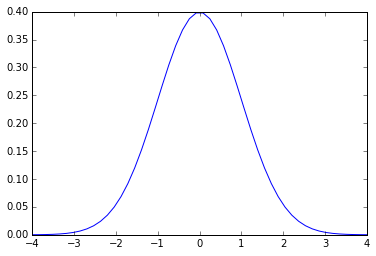

In [21]:
rv = stats.norm(0, 1)
x = linspace(-4, 4)
plot(x, rv.pdf(x))

正規分布に従う変数 $X$ が平均から $\pm\sigma$ 以内、$\pm2\sigma$ 以内，$\pm 3\sigma$ 以内に入る確率は是非覚えておきましょう。

In [22]:
rv = stats.norm(0, 1)
print (u'1σ以内:', rv.cdf(1)-rv.cdf(-1))
print (u'2σ以内:', rv.cdf(2)-rv.cdf(-2))
print (u'3σ以内:', rv.cdf(3)-rv.cdf(-3))

1σ以内: 0.682689492137
2σ以内: 0.954499736104
3σ以内: 0.997300203937


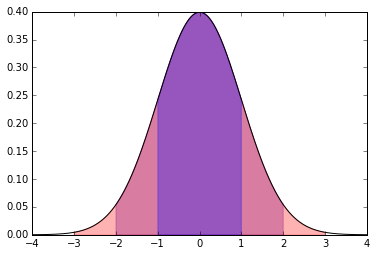

In [23]:
rv = stats.norm(0, 1)
x = linspace(-4, 4, 1000)
x1 = x[logical_and(-1 <= x, x <= 1)] # 1σ以内
x2 = x[logical_and(-2 <= x, x <= 2)] # 2σ以内
x3 = x[logical_and(-3 <= x, x <= 3)] # 3σ以内
fill_between(x3, 0, rv.pdf(x3), alpha=0.3, color='red', label=u'3σ以内')
fill_between(x2, 0, rv.pdf(x2), alpha=0.3, color='purple', label=u'2σ以内')
fill_between(x1, 0, rv.pdf(x1), alpha=0.3, color='blue', label=u'1σ以内')
plot(x, rv.pdf(x), color='black')

例えば、学校での試験における偏差値を考えてみましょう。偏差値とは得点分布を平均が $50$, 標準偏差が $10$ になるように調整したものです。得点分布が正規分布に従う場合には上の数値を使うことが出来て、

* 偏差値が 40～60 の人が全体の68.3%
* 偏差値が 30～70 の人が全体の95.4%
* 偏差値が 20～80 の人が全体の99.7%

と判ります。分布の対称性を考えれば、例えば偏差値が70以上の人は全体の $(100 - 95.4)/2 = 2.3$% であるといった計算が出来ます。

### 中心極限定理

正規分布が重要である理由の１つに**中心極限定理(central limit theorem)**というものがあります。

----
【中心極限定理】

$X_1,X_2,\ldots,X_n$ がi.i.d.でその平均が $\mu$, 分散 $\sigma^2$ のとき、その平均値(標本平均)

$$\overline{\mathbf{X}} = \frac{X_1 + X_2 + \cdots + X_n}{n}$$

の従う分布は $n$ が十分大きい時 $\mathrm{N}\left(\mu,\frac{\sigma^2}{n}\right)$ で近似出来る。
(厳密には分布収束という概念が必要ですが、ここでは省略します。)

----

分散が存在する分布(現実に登場する殆どの分布)についてこれが成り立ちます。例としてサイコロで実験してみましょう。まず、サイコロを $N$ 回振って平均値を出す為には次のようにします。何らかの数値が出たと思います。

dice = stats.randint(1, 6+1) # サイコロを用意
N = 100
dice.rvs(N).mean() # サイコロを N 回振って平均を求める。

これを $M$ 回行って、その結果のヒストグラムを描いてみましょう。

In [24]:
M = 10000
result = dice.rvs((M, N)).mean(axis=1) # MxN回サイコロを振って、Nについて(axis=1)平均を取る。
hist(result, bins=20, normed=True) # ヒストグラムを作成

NameError: name 'dice' is not defined

サイコロの出目の平均は $3.5$, 分散は$2.92$ なので中心極限定理によれば、これが $\mathrm{N}(3.5,2.92/N)$ で近似出来るはずです。

In [25]:
mu  = dice.mean() # サイコロの平均
var = dice.var()  # サイコロの分散

hist(result, bins=20, normed=True) # ヒストグラムを作成

x = linspace(3.0, 4.0)
plot(x, stats.norm(mu, sqrt(var/N)).pdf(x), color='red') # 正規分布N(μ, σ^2/N) を描く

NameError: name 'dice' is not defined

### 標準化

正規分布では $X\sim\mathrm{N}(\mu,\sigma^2)$ ならば， $a+bX \sim \mathrm{N}(a+b\mu, b^2\sigma^2)$ となります。

そこで $X\sim\mathrm{N}(\mu,\sigma^2)$ である変数に対して

$$ Z = \frac{X-\mu}{\sigma} $$

と置き直すと$ Z \sim \mathrm{N}(0, 1)$ となります。この操作を正規分布に従う確率変数の**標準化(normalization)**と呼びます。

### 再生性

正規分布に従う確率変数は**再生性(reductive property)**というとても良い性質を持ちます。

----
【正規分布の再生性】

$X_1,X_2$ がそれぞれ正規分布に従うならば、$X_1+X_2$ も正規分布に従う。

具体的には$X_1\sim \mathrm{N}(\mu_1,\sigma_1^2),X_2\sim\mathrm{N}(\mu_2,\sigma_2^2)$ ならば $X_1+X_2\sim\mathrm{N}(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$である。

----

例えば、ある学校で行ったの試験の得点分布が

- 数学の点数: 平均点 $53$ 点, 標準偏差 $11$ 点の正規分布
- 英語の点数: 平均点 $72$ 点, 標準偏差 $7$ 点の正規分布

であったとしましょう。すると

- 数学の点数 + 英語の点数: 平均点 $125$ 点、標準偏差 $\sqrt{11^2 + 7^2} = 13.0$ 点の正規分布

という事になります。

### 正規分布とエントロピー

平均が $\mu$, 分散が $\sigma^2$ である分布 $\pi(x)$ で、エントロピー

$$\mathrm{H}(\pi) = -\int_{-\infty}^\infty \pi(x)\log\pi(x)\mathrm{d}x$$

が最大になる分布が実は正規分布 $\mathrm{N}(X|\mu,\sigma^2)$ です。つまり、平均・分散以外に余計な構造を仮定しない(つまり最も乱雑な)分布が正規分布であるという事になります。統計学では未知の分布に対してそれが正規分布であると仮定するという事を良く行いますが、それが妥当であると考えられるのはこのためです。エントロピー最大化による分布の導出方法は覚えておく価値があると思うので、以下に証明を書いておきます。

---
【証明】

平均値が $\mu$, 分散が $\sigma^2$ であるという条件下でエントロピーを最大にする $\pi(x)$ を求める。その為にはラグランジュの未定乗数 $\alpha,\beta,\gamma$ を導入して

$$ \begin{aligned}
F(\pi,\alpha,\beta,\gamma) &= -\int_{-\infty}^\infty\pi(x)\log \pi(x)\mathrm{d}x-\alpha\left(\int_{-\infty}^\infty\pi(x)\mathrm{d}x-1\right)
-\beta\left(\int_{-\infty}^\infty x\pi(x)\mathrm{d}x-\mu\right)-\gamma\left(\int_{-\infty}^\infty(x-\mu)^2\pi(x)\mathrm{d}x-\sigma^2\right)\\
 &= -\int_{-\infty}^\infty\{\pi(x)\log \pi(x)+\alpha\pi(x)+\beta x\pi(x) + \gamma(x-\mu)^2\pi(x)\}\mathrm{d} x + \alpha + \mu\beta + \sigma^2\gamma
\end{aligned}$$

が停留点を取る条件を求めれば良い。すなわち、各変数で微分($\pi$は関数なので変分)した以下が全て $0$ となれば良い。

$$\begin{aligned}
\frac{\delta F}{\delta \pi} &= -\int_{-\infty}^\infty\{\log \pi(x) + 1 + \alpha + \beta x + \gamma(x-\mu)^2\}\mathrm{d}x\qquad\cdots(1) \\
\frac{\partial F}{\partial \alpha} &= -\int_{-\infty}^\infty\pi(x)\mathrm{d}x+1 \qquad\cdots(2)\\
\frac{\partial F}{\partial \beta} &= -\int_{-\infty}^\infty x\pi(x)\mathrm{d}x + \mu \qquad\cdots(3)\\
\frac{\partial F}{\partial \gamma} &= -\int_{-\infty}^\infty (x-\mu)^2\pi(x)\mathrm{d}x + \sigma^2 \qquad\cdots(4)
\end{aligned}$$

まず(1)が$\pi$の微小変化に対して $0$ になる為には積分の中が $0$ である事が必要だから

$$\log \pi(x) + 1 + \alpha + \beta x + \gamma(x-\mu)^2 = 0$$ 

つまり

$$ \pi(x) = \exp\{-1-\alpha-\beta x-\gamma(x-\mu)^2\}\qquad\cdots(5)$$

と表される事が必要。ここで 
$$y = \sqrt{\gamma}\left(x - \mu + \frac{\beta}{2\gamma}\right)=\sqrt{\gamma}(x-\delta)\qquad\left(\delta=\mu-\frac{\beta}{2\gamma}\right)$$
と置き換えると

$$ \pi(x) = \exp\left\{-y^2-1-\alpha-\beta\mu+\frac{\beta^2}{4\gamma}\right\}=\epsilon e^{-y^2}\qquad\left(\epsilon=\exp\left\{-1-\alpha-\beta\mu+\frac{\beta^2}{4\gamma}\right\}\right)$$

となるので、

$$\int_{-\infty}^\infty\pi(x)\mathrm{d}x = \frac{\epsilon}{\sqrt{\gamma}}\int_{-\infty}^\infty e^{-y^2}\mathrm{d}y = \epsilon\sqrt{\frac{\pi}{\gamma}}$$
$$\int_{-\infty}^\infty x\pi(x)\mathrm{d}x = \frac{\epsilon}{\sqrt{\gamma}}\int_{-\infty}^\infty\left(\frac{y}{\sqrt{\gamma}}+\delta\right)e^{-y^2}\mathrm{d}y = \delta\epsilon\sqrt{\frac{\pi}{\gamma}}$$
$$\int_{-\infty}^\infty (x-\mu)^2\pi(x)\mathrm{d}x = \frac{\epsilon}{\sqrt{\gamma}}\int_{-\infty}^\infty\left(\frac{y}{\sqrt{\gamma}}+\delta-\mu\right)^2e^{-y^2}\mathrm{d}y = \frac{\epsilon}{\sqrt{\gamma}}\left(\frac{\sqrt{\pi}}{2\gamma}+(\delta-\mu)^2\sqrt{\pi}\right)$$

従って (2)(3)(4)より
$$\epsilon\sqrt{\frac{\pi}{\gamma}} = 1,\quad \delta\epsilon\sqrt{\frac{\pi}{\gamma}}=\mu,\quad \frac{\epsilon}{\sqrt{\gamma}}\left(\frac{\sqrt{\pi}}{2\gamma}+(\delta-\mu)^2\sqrt{\pi}\right)=\sigma^2$$
である。最初の2式より $\delta=\mu$ なので $\beta = 0$。また第１,3式より $1/(2\gamma)=\sigma^2$ つまり $\gamma=1/(2\sigma^2)$ 。また $\epsilon=1/\sqrt{2\pi\sigma^2}$。よって$1/\sqrt{2\pi\sigma^2} = \exp(1-\alpha)$ 以上を (5) に代入して

$$\pi(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\} $$

----

### 二項分布との関係

$X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}\mathrm{Bern}(p)$ の時
$$ X_1  + \cdots + X_n \sim \mathrm{Bin}(n,p)$$
でした。ベルヌーイ分布の平均は $p$, 分散は $p(1-p)$ なので、中心極限定理より $n$ が十分大きいとき $\overline{X}\sim\mathrm{N}(p, p(1-p)/n)$ となります。従って $X_1 + \cdots + X_n = n\overline{X}$ なので $n$ が十分大きい時
$$ X_1 + \cdots + X_n \sim \mathrm{N}(np,np(1-p))$$
となります。これから二項分布を正規分布で近似出来る(逆もしかり)事が判ります。

----
$n$ が十分大きい時

$$\mathrm{Bin}(X|n,p)\approx\mathrm{N}(X|np,np(1-p))$$

と近似出来る。

----

この関係は後に $p$ の区間推定などで実際に使います。

n = 100
p = 0.3
mu    = n*p
sigma = sqrt(n*p*(1-p))
xlim(mu-3*sigma, mu + 3*sigma)
x = arange(int(mu-3*sigma), int(mu+3*sigma))
bar(x, stats.binom(n,p).pmf(x), align='center', width=0.5)
plot(x, stats.norm(mu, sigma).pdf(x), color='red')

## 多次元正規分布

多次元の正規分布も同様に考える事が出来ます。平均が $\boldsymbol{\mu}$, 分散共分散行列が $\boldsymbol{\Sigma}$ である様な分布でエントロピーが最大の物を求めると多次元正規分布の密度関数の方程式

$$ \mathrm{N}(\mathbf{x}|\boldsymbol{\mu},\boldsymbol{\Sigma}) =\frac{1}{\sqrt{(2\pi)^d|\boldsymbol{\Sigma}|}}\exp\left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right\} \qquad \text{($d$は次元)}$$

が得られます。多次元正規分布はscipy.stats.multivariate_normalで実装されています。

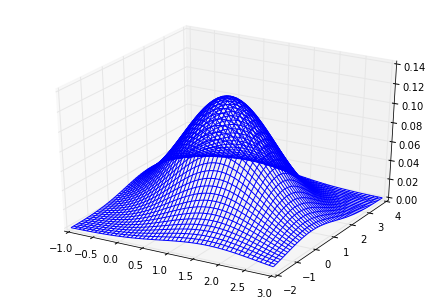

In [26]:
# ２次元正規分布
mu = array([1, 1]) # 平均
S  = array([[1.0, -0.5],[-0.5, 2.0]]) # 分散共分散行列
rv = stats.multivariate_normal(mu, S) # N(mu, S)

from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
x, y = meshgrid(linspace(-1, 3), linspace(-2, 4))
z = rv.pdf(transpose([x,y], (1,2,0)))
ax.plot_wireframe(x, y, z)

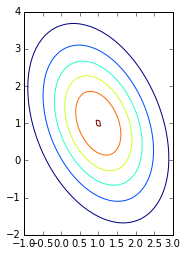

In [27]:
axes().set_aspect('equal')
contour(x, y, z)

## 指数分布
定数 $\lambda > 0$ に対して $x\geq 0$ で定義された密度関数が

$$\pi(x) = \lambda e^{-\lambda x} $$

であるものを**指数分布(exponential distribution)**と呼び、$\mathrm{Exp}(X|\lambda)$ と書く。
$$\mathrm{E}[X] = \frac{1}{\lambda},\qquad\mathrm{V}[X] = \frac{1}{\lambda^2}$$

指数分布はポアソン分布 $\mathrm{Po}(X|\lambda)$ に従うイベントが、次に発生するまでの待ち時間の分布です。scipy.stats.exponがこれを実装しています。$\mathrm{Exp}(X|\lambda)$ を作る為には,`scale`パラメータに$1/\lambda$を渡します。

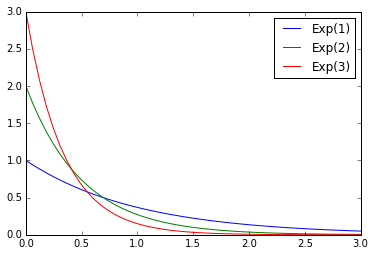

In [28]:
x = linspace(0, 3)
plot(x, stats.expon(scale=1.0/1).pdf(x), label='Exp(1)')
plot(x, stats.expon(scale=1.0/2).pdf(x), label='Exp(2)')
plot(x, stats.expon(scale=1.0/3).pdf(x), label='Exp(3)')
legend()

### 例題
ある商店には１時間あたり平均で3人が来客する。次の客を30分以上待たなければならない確率は？

rv = stats.expon(scale=1.0/3)
print 'P(X >= 0.5) = 1 - P(X <= 0.5) =', 1-rv.cdf(0.5)

客を待ち続けて既に2時間来ていないという条件下で、さらに30分以上待たなければならない確率は？

In [2]:
print ('P(X >= 2.5 | X >= 2) = P(X >= 2.5 かつ X >= 2)/P(X >= 2) = P(X >= 2.5)/P(X >= 2) =', (1-rv.cdf(2.5))/(1-rv.cdf(2)))

NameError: name 'rv' is not defined

今実験した２つの値が等しい事に注目して下さい。ポアソン分布に従い発生する事象に対しては、「もうずっと客が来ていないから、そろそろ来るだろう」という考察は誤りであって、幾ら長く待とうが残り時間の確率分布は変わりません。(ベイズ確率論的には、「もうずっと客が来ていないから、実は $\lambda$ は思っていたより小さいのでは？」という改訂はありえます。)

### 無記憶性
今の例で見た性質を指数分布の**無記憶性(memoryless)**と呼びます。

----
【無記憶性】

任意の $s,t > 0$ に対して $P(X > s+t | X > s) = P(X > t)$

----

指数分布は無記憶性を持つ唯一の分布である事を示す事が出来ます。

----
【証明】

任意の $s,t > 0$ に対して $P(X > s+t | X > s) = P(X > t)$
であるとする。累積分布関数を $F(X)$ として $G(X) = 1-F(X)$ と置くと、
$$ P(X > t) = 1 - P(X >= t) = G(t),\quad P(X > s+t | X > s) = \frac{P(X > s+t, X > s)}{P(X > s)} = \frac{P(X > s+t)}{P(X > s)} = \frac{G(s+t)}{G(s)}$$
であるから、

$$ G(s+t) = G(s)G(t)$$

が成り立つ。従って

$$ \frac{G(s+t)-G(s)}{t} = G(s)\frac{G(t)-G(0)}{t}\qquad(\because G(0)=1-F(0)=1)$$

であるので両辺の $t\rightarrow 0$ の極限を取ると

$$ G'(s) = G(s)G'(0)$$

が成り立つ。 $G(x)$ は単調減少関数($F(x)$ が単調増加)なので $G'(0) = -\lambda\quad(\lambda > 0)$ とおくと$ G'(x) = -\lambda G(x)$より

$$ G(x) = \exp(-\lambda x)\qquad (\because G(0) = 1)$$
である。従って

$$ F(x) = 1-\exp(-\lambda x)$$

であるから、

$$\pi(x) = \frac{\mathrm{d} F}{\mathrm{d} x} = \lambda\exp(-\lambda x)$$

となる。

----

エントロピーの観点からは「平均値が $1/\lambda$ という条件を満たしエントロピーを最大にする確率分布が $\mathrm{Exp}(X|\lambda)$ である」事を示す事が出来ます。やってみてください。

### 幾何分布との関係
指数分布は幾何分布の連続版であると考える事が出来ます。
- エベントが初めて生じるまでの試行回数の分布:幾何分布 $\mathrm{Geom}(X|p)$
- イベントが初めて生じるまでの時間の分布: 指数分布 $\mathrm{Exp}(X|\lambda)$

あるイベントの生じる確率が $p$ であるというのは、一回あたり平均 $p$ 回という意味なので、

$$ \mathrm{Geom}(X|p) \approx\mathrm{Exp}\left(X\middle|p\right)$$

と近似出来ます。

p = 0.1
geom  = stats.geom(p)
expon = stats.expon(scale = 1/p)
x = arange(1, 30)
bar(x, geom.pmf(x), alpha=0.3, align='center', width=0.5, color='blue', label='Geom(%f)' % p)
x = linspace(0, 30)
plot(x, expon.pdf(x), color='red', label='Exp(%f)' % p)
legend()

## ガンマ分布
定数 $\lambda,k > 0$ に対して $x > 0$ 上での密度関数が
$$ \pi(x) \approx x^{k-1}e^{-\lambda x}$$
と表される確率分布を **ガンマ分布(gamma distribution)** と呼び，$\mathrm{Gamma}(X| k, \lambda)$ と書きます。テキストによっては$\theta=1/\lambda$を用いて $\mathrm{Ga}(X|k,\theta)$ と書く場合もあるので注意して下さい。このテキストでは $\lambda$ を用いた記述に統一します。
ガンマ分布は指数分布を一般化したものであり $\mathrm{Exp}(X|\lambda) = \mathrm{Ga}(X|1, \lambda)$ の関係があります。
$$\mathrm{E}[X] = \frac{k}{\lambda},\qquad\mathrm{V}[X]=\frac{k}{\lambda^2}$$
ガンマ分布は $\mathrm{Po}(\lambda)$ に従うイベントが $X$ 回(整数とは限らない)生じるまでの待ち時間を表していると解釈する事が出来ます。

以下は $k$ を固定した場合のガンマ分布の様子です。$\lambda$ が増えるほど(発生頻度が増えるほど)待ち時間は小さくなる傾向があります。

k = 3
x = linspace(0, 5)
plot(x, stats.gamma(k, scale=1.0/1).pdf(x), label='Ga(3, 1)')
plot(x, stats.gamma(k, scale=1.0/2).pdf(x), label='Ga(3, 2)')
plot(x, stats.gamma(k, scale=1.0/3).pdf(x), label='GA(3, 3)')
legend()

以下は $\lambda$ を固定した場合です。$k$回生じるまでの時間は当然長くなっていきます。

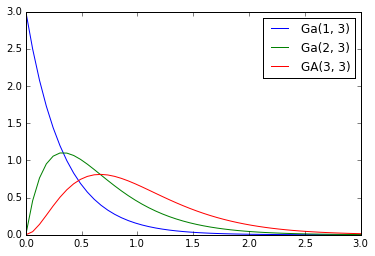

In [35]:
lam = 3
x = linspace(0, 3)
plot(x, stats.gamma(1, scale=1.0/lam).pdf(x), label='Ga(1, 3)')
plot(x, stats.gamma(2, scale=1.0/lam).pdf(x), label='Ga(2, 3)')
plot(x, stats.gamma(3, scale=1.0/lam).pdf(x), label='GA(3, 3)')
legend()

### 例
１日当たり平均5人の新規登録があるサービスを運営しているとします。半年以内に1000人の新規ユーザを得る確率は？

In [36]:
print (stats.gamma(1000.0, scale = 1/5.0).cdf(365.0/2))

0.00224534274454


### 負の二項分布との関係
指数分布が幾何分布の連続版とみなせたように、負の二項分布の連続版がガンマ分布です。

## 逆ガンマ分布

$X \sim \mathrm{Gamma}(X|k,\lambda)$ の時に $1/X$ が従う確率分布を**逆ガンマ分布(inverse gamma distribution)**と呼び $\mathrm{InvGamma}(X|k,\lambda)$ と書きます。従って変数変換の公式を用いればその密度関数は

$$\pi(x) \propto x^{-k-1}e^{-\lambda/x}\qquad(x \geq 0)$$

となります。平均は

$$\mathrm{E}[X] = \frac{\lambda}{k-1}\quad(k > 1),\qquad \mathrm{V}[X] = \frac{\lambda^2}{(k-1)^2(k-2)^2}\quad(k>2)$$

です。

/Users/tokuharaminho/.pyenv/versions/3.4.1/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:2225: RuntimeWarning: divide by zero encountered in log
  return (-(a+1) * log(x) - gamln(a) - 1.0/x)
/Users/tokuharaminho/.pyenv/versions/3.4.1/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:2225: RuntimeWarning: divide by zero encountered in true_divide
  return (-(a+1) * log(x) - gamln(a) - 1.0/x)
/Users/tokuharaminho/.pyenv/versions/3.4.1/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:2225: RuntimeWarning: invalid value encountered in subtract
  return (-(a+1) * log(x) - gamln(a) - 1.0/x)


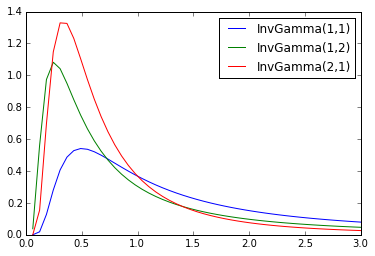

In [37]:
x = linspace(0, 3)
plot(x, stats.invgamma(1, scale=1/1.0).pdf(x), label='InvGamma(1,1)')
plot(x, stats.invgamma(1, scale=1/2.0).pdf(x), label='InvGamma(1,2)')
plot(x, stats.invgamma(2, scale=1/1.0).pdf(x), label='InvGamma(2,1)')
legend()

ガンマ分布はポアソン的に発生するイベントが $k$ 回生じるまでの待ち時間の分布という解釈が可能でしたが、逆ガンマ分布に対する分かりやすい解釈はありません。後の回に説明しますが、逆ガンマ分布はベイズ統計においてパラメータの事前分布を表現する目的で主に使われます。

### 平均・分散の存在しない分布
ところで、逆ガンマ分布の平均・分散は $k\leq 1$ や $k\leq 2$の時には存在しないという事に注意しましょう。このような分布では中心極限定理や後に述べる大数の法則など、統計学の重要な定理が成立しませんので注意して下さい。

例えば、$X_1,\ldots,X_n$ がi.i.d. ならば標本平均 $\overline{X}$ の値は $n\rightarrow\infty$ の時分布の平均値に収束します(大数の法則)。例えば $\mathrm{Bern}(p)$ に従う試行を多数行えば、標本の平均値は $p$ に収束します。

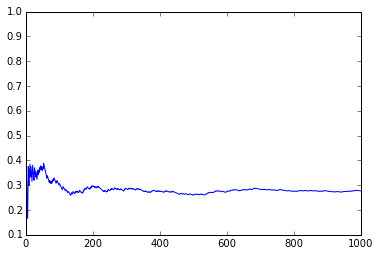

In [38]:
# Bern(0.3) の場合 (標本平均は0.3に近づいていくはず)
N = 1000
samples = []
s = 0.0 # 標本の和
for k in range(N):
    x = stats.bernoulli(0.3).rvs(1) # サンプリング
    s += x                  # 和を更新して 
    samples.append(s/(k+1)) # k+1での標本平均を追加
plot(samples)

一方で、平均の存在しない分布ではこれが成り立ちません。例として $\mathrm{InvGamma}(1, 2)$ からの標本平均の様子をプロットしてみましょう。

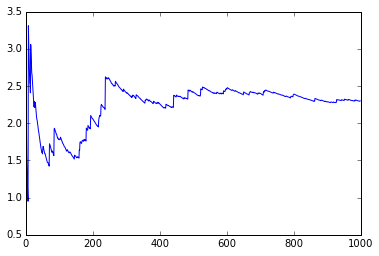

In [39]:
# InvGamma(1,2)の場合. 平均が存在しないので収束しないはず。
N = 1000
samples = []
s = 0.0 # 標本の和
for k in range(N):
    x = stats.invgamma(1, scale=1/2.0).rvs(1) # サンプリング
    s += x                  # 和を更新して 
    samples.append(s/(k+1)) # k+1での標本平均を追加
plot(samples)

以後、他にも平均や分散の存在しない分布が複数登場します。それらに対しては通常の統計分析手法が使えないので、分布の名前は覚えておくと良いと思います。

## ベータ分布

定数 $\alpha,\beta>0$ に対して区間 $[0,1]$ で定義された密度関数が

$$\pi(x)\propto x^{\alpha-1}(1-x)^{\beta -1}$$

となるものを**ベータ分布(beta distribution)**と呼び $\mathrm{Beta}(X|\alpha,\beta)$ と書きます。標準一様分布はベータ分布の特別な場合であり、$\mathrm{U}(X)=\mathrm{Beta}(X|1,1)$です。
$$\mathrm{E}[X] = \frac{\alpha}{\alpha+\beta},\qquad\mathrm{V}[X]=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

x = linspace(0, 1)
plot(x, stats.beta(1, 1).pdf(x), label='Beta(1,1)')
plot(x, stats.beta(2, 2).pdf(x), label='Beta(2,2)')
plot(x, stats.beta(3, 4).pdf(x), label='Beta(3,4)')
plot(x, stats.beta(0.5, 2).pdf(x), label='Beta(1/2,2)')
legend()

ベータ分布も自然な解釈は難しく、逆ガンマ分布と同様にベイズ統計学においてパラメータ推定に利用されます。典型的な利用例は、$\mathrm{Bern}(p)$ や $\mathrm{Bin}(n,p)$ などの確率パラメータ $p$ の推定です。この意味は逆ガンマ分布の場合より分かりやすいので以下具体例を上げて説明します。

例として、いびつなコインの表が出る確率 $\theta$ をベイズ的に推定するとして、$\theta$ の値に対する事前分布(事前の信念)をモデル化してみます。

例1: $\theta=1/2$ に非常に近い値だと信じている人の事前分布

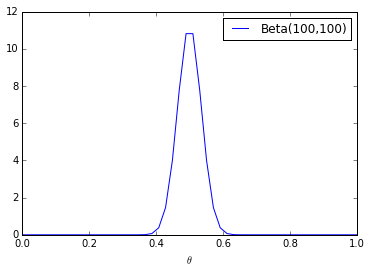

In [40]:
x = linspace(0, 1)
plot(x, stats.beta(100, 100).pdf(x), label='Beta(100,100)')
xlabel(r'$\theta$')
legend()

例2: $\theta=1/2$ に非常に近い値だともっと強く信じている人の事前分布

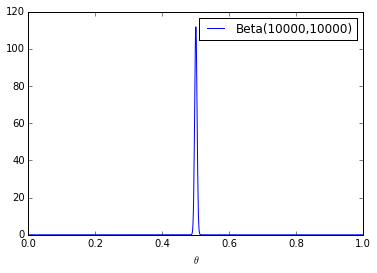

In [41]:
x = linspace(0, 1, 1000)
plot(x, stats.beta(10000, 10000).pdf(x), label='Beta(10000,10000)')
xlabel(r'$\theta$')
legend()

例3: $\theta=1/2$ の辺だろうと思っているけどあまり自信がない人の事前分布

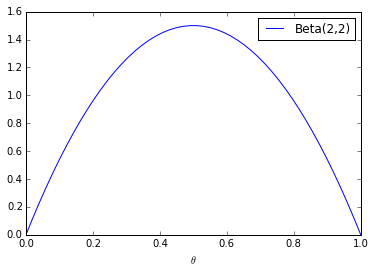

In [42]:
x = linspace(0, 1)
plot(x, stats.beta(2.0, 2.0).pdf(x), label='Beta(2,2)')
xlabel(r'$\theta$')
legend()

例4: 絶対表が出るイカサマコインだと信じている人の事前分布

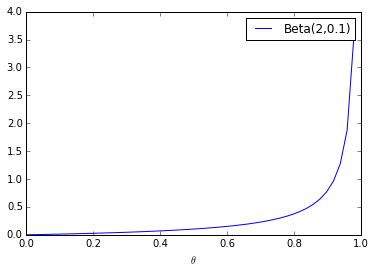

In [43]:
x = linspace(0, 1)
plot(x, stats.beta(2.0, 0.1).pdf(x), label='Beta(2,0.1)')
xlabel(r'$\theta$')
legend()

## ディリクレ分布
$K$ 次元のパラメータ $\boldsymbol{\alpha}=(\alpha_1,\alpha_2,\ldots,\alpha_K)\quad(\alpha_i >0)$ に対して，$K$ 次元確率変数 $\mathbf{X}$ 上の密度関数が

$$ \pi(\mathbf{x}) \propto \prod_{i=1}^{K}x_i^{\alpha_i-1} \qquad (x_1,x_2,\ldots,x_K\geq 0, x_1+x_2+\cdots+x_K=1) $$

と表される確率分布を**ディリクレ分布(Dirichlet distribution)**と呼び$\mathrm{Dirichlet}_K(\mathbf{X}|\boldsymbol{\alpha})$と書きます。
平均は$\mathrm{E}[\mathbf{X}] = \frac{1}{\sum_{i=1}^K\alpha_i}\boldsymbol{\alpha}$で、分散共分散行列は

$$\Sigma_{ii} = \frac{\alpha_i(c-\alpha_i)}{c^2(c+1)},\quad\Sigma_{ij} = \frac{-\alpha_i\alpha_j}{c^2(c+1)}\qquad(c = \sum_{i=1}^K\alpha_i)$$

です。

ディリクレ分布はベータ分布を一般化したもので、$\mathrm{Beta}(X|\alpha,\beta) = \mathrm{Dirichlet}_K((X, 1-X) | (\alpha,\beta))$ が成り立ちます。
使い方もベータ分布と同様で、$\mathrm{Cat}_K(\mathbf{p})$ や $\mathrm{MultiNomial}_K(n,\mathbf{p})$ などの確率パラメータ $\mathbf{p}$ を推定する際の事前分布として利用されます。特に自然言語処理などでは文字や単語の出現頻度(カテゴリ分布に従う)を推定する問題が頻繁に登場する為、ディリクレ分布は重要です。

やはりscipy.statsにディリクレ分布は用意されていませんが、numpy.random.dirichletでサンプリングは出来ます。

### 例
例えば袋の中に大量の赤球、青球、白球が入っているとします。ここである人は、この袋の中にそれぞれが$\text{赤}:\text{青}:\text{白} = 1:3:2$ くらいの比率でで入っているだろうと思っているとします。これをディリクレ分布で表す為には $\boldsymbol{\alpha}=k(1,3,2)\quad\text{($k$は定数)}$ のディリクレ分布を使います。$k$ の値が大きいほど、この人は自分の予想がより正確だと思っている事になります。散布図をプロットして違いをみてみましょう。

[ 0.17430073  0.4818333   0.34386597]
[ 0.16803428  0.49999031  0.33197541]


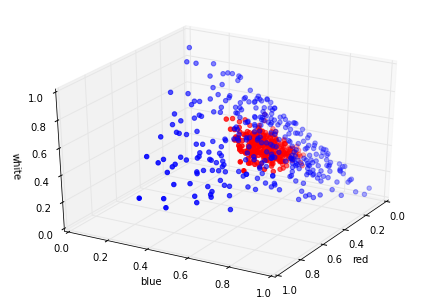

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_xlabel('red')
ax.set_ylabel('blue')
ax.set_zlabel('white')
ax.view_init(azim=30)

N = 300

# Dirichlet_3(X | (1, 3, 2)) からのサンプリング例
samples = array( random.dirichlet([1, 3, 2], N) )
ax.scatter(samples[:,0], samples[:,1], samples[:,2], color='blue', label='Dirichlet3(1,3,2)')
print (average(samples, axis=0))

# Dirichlet_3(X | 10(1, 3, 2)) からのサンプリング例
samples = array( random.dirichlet([10, 30, 20], N) )
ax.scatter(samples[:,0], samples[:,1], samples[:,2], color='red', label='Dirichlet3(10,30,20)')
print (average(samples, axis=0))

## $\chi^2$ 分布

$Z_1,\ldots,Z_K\stackrel{\text{i.i.d.}}{\sim}\mathrm{N}(0,1)$ の時，
$$ X=Z_1^2 + \cdots + Z_K^2 $$
の従う確率分布を自由度 $K$ の**$\chi^2$(カイ二乗)分布(chi squared distribution)**と呼び，$\chi^2_K(X)$ と書きます。$\chi^2$検定など、統計学で非常に良く使うことになる分布です。密度関数は

$$ \pi(x) \propto x^{K/2-1}e^{-x/2}$$

となります。これから $\chi^2$ 分布はガンマ分布の一種であり

$$ \chi^2_K(X) = \mathrm{Gamma}(X|K/2, 1/2) $$

である事が判ります。また

$$ \mathrm{E}[X] = K,\qquad\mathrm{V}[X]=2K$$

です。

x = linspace(0, 10)
plot(x, stats.chi2(1).pdf(x), label=u'$\chi^2_1$')
plot(x, stats.chi2(2).pdf(x), label=u'$\chi^2_2$')
plot(x, stats.chi2(3).pdf(x), label=u'$\chi^2_3$')
plot(x, stats.chi2(4).pdf(x), label=u'$\chi^2_4$')
legend()

## $t$分布

定数 $\nu \geq 1$ に対して $X > 0$ 上の確率密度関数が

$$\pi(x) \propto \left(1+\frac{x^2}{\nu}\right)^{-(\nu+1)/2}$$

と表される分布を自由度 $\nu$ の**$t$分布(t distribution)** またはスチューデントの $t$ 分布と呼び、$t_{\nu}(X)$ と書きます。この分布に従う確率変数が何を表すのかという事は統計学に入ってから説明しますが、統計学において極めて重要な分布です。$t$ 分布は $\nu\rightarrow\infty$ の時標準正規分布 $\mathrm{N}(0,1)$ と一致します。$t$ 分布の平均値、分散は以下のようになります。

$$ \mathrm{E}[X] = 0\quad (\nu > 1\text{の時}),\qquad \mathrm{V}[X] = \frac{\nu}{\nu-2}\quad(\nu > 2\text{の時})$$

カッコ内の条件が満たされない時、平均や分散は存在しません。

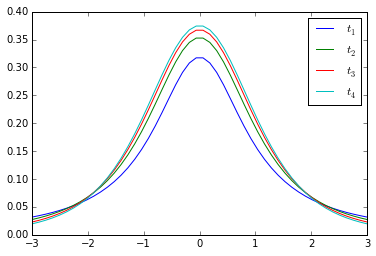

In [47]:
x = linspace(-3, 3)
plot(x, stats.t(1).pdf(x), label='$t_1$')
plot(x, stats.t(2).pdf(x), label='$t_2$')
plot(x, stats.t(3).pdf(x), label='$t_3$')
plot(x, stats.t(4).pdf(x), label='$t_4$')
legend()

## $F$分布

$X_1\sim\chi^2_{\nu_1}, X_2\sim\chi^2_{\nu_2}$で $X_1,X_2$ が独立の時に

$$ X = \frac{X_1}{X_2} $$

の従う分布を 自由度 $\nu_1,\nu_2$ の**$F$ 分布(F distribution)**と呼び $F(X|\nu_1,\nu_2)$ と書きます。

$$ \pi(x)\propto \frac{1}{x}\left(\frac{\nu_1x}{\nu_1x+\nu_2}\right)^{\nu_1/2}\left(1-\frac{\nu_1x}{\nu_1x+\nu_2}\right)^{\nu_2/2}\qquad(x\geq 0)$$

$$\mathrm{E}[X] = \frac{\nu_2}{\nu_2-2}\quad(\nu_2 > 2),\qquad\mathrm{V}[X]=\frac{2\nu_2^2(\nu_1+\nu_2-2)}{\nu_1(\nu_2-2)^2(\nu_2-4)}\quad(\nu_2 > 4)$$

$F$ 分布も条件によっては平均や分散が存在しない分布の例です。

x = linspace(0, 3)
plot(x, stats.f(1, 1).pdf(x), label='F(1,1)')
plot(x, stats.f(2, 1).pdf(x), label='F(2,1)')
plot(x, stats.f(3, 3).pdf(x), label='F(3,3)')
legend()

/Users/tokuharaminho/.pyenv/versions/3.4.1/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:1176: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * log(m) + n/2 * log(n) + (n/2 - 1) * log(x)
/Users/tokuharaminho/.pyenv/versions/3.4.1/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:1176: RuntimeWarning: invalid value encountered in multiply
  lPx = m/2 * log(m) + n/2 * log(n) + (n/2 - 1) * log(x)


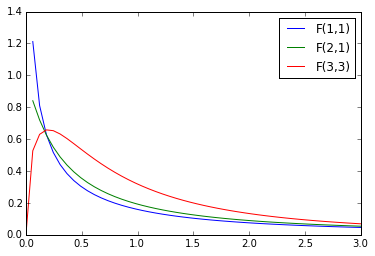

In [48]:
x = linspace(0, 3)
plot(x, stats.f(1, 1).pdf(x), label='F(1,1)')
plot(x, stats.f(2, 1).pdf(x), label='F(2,1)')
plot(x, stats.f(3, 3).pdf(x), label='F(3,3)')
legend()